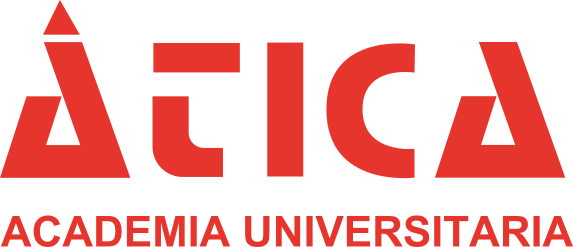

# Listas

API: https://www.scala-lang.org/api/current/scala/collection/immutable/List.html

In [ ]:
import $ivy.`org.scalatest::scalatest:3.0.8`
import org.scalatest._

1. Escriba una función que elimine de una lista de enteros aquellos que sean múltiplos de un número entero dado.

In [ ]:
class TestSift(sift: (List[Int], Int) => List[Int]) extends FlatSpec with Matchers {
    "sift" should "work" in {
        sift(List(), 5) shouldBe 
            List()
        sift(List(0, 2, 1, 3, -4), 2) shouldBe 
            List(1, 3)
        sift(List(7, 15, -1, 5, 7), 3) shouldBe 
            List(7, -1, 5, 7)
        sift(List(0, 5, 8, 9, -9, 6, 0, 85, -12, 15), 2) shouldBe 
            List(5, 9, -9, 85, 15)
        sift(List(0, 2, 1, 3, -4), 1) shouldBe 
            List()
    }
}

In [ ]:
def sift(list: List[Int], n: Int): List[Int] = 
    list.foldLeft(List[Int]())(
        (acc, elem) =>
            if (elem % n == 0)
                acc
            else
                acc ++ List(elem)
    )

In [ ]:
run(new TestSift(sift))

2. Escriba una función que, dada una lista de elementos, devuelva una lista de duplas formadas por los elementos sin repetir de la lista junto con la primera posición en la que aparecen. La primera posición de la lista es 1.

In [ ]:
class TestFirstAppearance(firstAppearance: (List[Int]) => List[(Int, Int)]) extends FlatSpec with Matchers {
    "firstAppearance" should "work" in {
        firstAppearance(List()) shouldBe 
            List()
        firstAppearance(List(1, 5, 6, 0, 2, 6, 4, 1)) shouldBe 
            List((1, 1), (5, 2), (6, 3), (0, 4), (2, 5), (4, 7))
        firstAppearance(List(1, 1, 1)) shouldBe 
            List((1,1))
    }
}

In [ ]:
def firstAppearance[A](list: List[A]): List[(A, Int)] =
    list.foldLeft((1, List[A](), List[(A, Int)]()))({
        case ((index, visited, result), elem) =>
            if (!visited.contains(elem))
                (index + 1, visited ++ List(elem), result ++ List((elem, index)))
            else
                (index + 1, visited, result)
    })._3

In [ ]:
run(new TestFirstAppearance(firstAppearance))

3. Escriba una función que calcule el número de secuencias de ceros que hay en una lista de números enteros.

In [ ]:
class TestZeros(zeros: (List[Int]) => Int) extends FlatSpec with Matchers {
    "zeros" should "work" in {
        zeros(List(0, 1, 0)) shouldBe 
            2
        zeros(List(0, 0)) shouldBe 
            1
        zeros(List(0, 0, 1, 5, 0, 4, 0, 0, 0, 5)) shouldBe 
            3
    }
}

In [ ]:
def zeros(list: List[Int]): Int = 
    list.foldLeft((false, 0))({
        case ((true, total), elem) if (elem != 0) =>
            (false, total)
        case ((false, total), 0) =>
            (true, total + 1)
        case ((isCurrentlyZeros, total), _) =>
            (isCurrentlyZeros, total)
    })._2

In [ ]:
run(new TestZeros(zeros))

4. Escriba una función que, haciendo uso de la HOF __fold__ (en cualquiera de sus dos versiones), reciba un elemento y una lista de elementos del mismo tipo y determine si dicho elemento está incluido en la lista.

In [ ]:
class TestContains(contains: (List[Int], Int) => Boolean) extends FlatSpec with Matchers {
    "contains" should "work" in {
        contains(List(), 1) shouldBe false
        contains(List(1, 2, 3, 4, 5), 3) shouldBe true
        contains(List(1, 2, 3, 4, 5), 7) shouldBe false
    }
}

In [ ]:
def contains[A](list: List[A], a: A): Boolean = 
    list.foldLeft(false)({
        case (false, elem) if (elem == a) =>
            true
        case (result, _) =>
            result
    })

In [ ]:
run(new TestContains(contains))

5. Escriba una función que, haciendo uso de la versión de __fold__ no utilizada en el ejercicio anterior, elimine de la lista todas las apariciones del elemento que reciba como parámetro.

In [ ]:
class TestRemove(remove: (List[Int], Int) => List[Int]) extends FlatSpec with Matchers {
    "remove" should "work" in {
        remove(List(), 1) shouldBe List()
        remove(List(1, 2, 3, 4, 5), 3) shouldBe List(1, 2, 4, 5)
        remove(List(1, 2, 3, 2, 2, 3), 2) shouldBe List(1, 3, 3)
    }
}

In [ ]:
def remove[A](list: List[A], a: A): List[A] = 
    list.foldRight(List[A]())(
        (elem, acc) =>
            if (elem == a)
                acc
            else
                elem :: acc
    )

In [ ]:
run(new TestRemove(remove))

6. Escriba una función que, dada una lista y una función que recibe un elemento de la lista y devuelve un "booleano", devuelva como resultado una lista que contenga exclusivamente los elementos de la lista original para los que la función pasada como parámetro devuelva "true". Es obligatorio el uso de cualquier HOF __fold__.

In [ ]:
class TestFoldFilter(foldFilter: List[Int] => (Int => Boolean) => List[Int]) extends FlatSpec with Matchers {
    "remove" should "work" in {
        val isEven: Int => Boolean = _ % 2 == 0

        foldFilter(List())(isEven) shouldBe List()
        foldFilter(List(1, 2, 3, 4, 5))(isEven) shouldBe List(2, 4)
        foldFilter(List(1, 2, 3, 2, 2, 3))(isEven) shouldBe List(2, 2, 2)
    }
}

In [ ]:
def foldFilter[A](list: List[A])(predicate: A => Boolean): List[A] = 
    list.foldLeft(List[A]())(
        (acc, elem) =>
            if (predicate(elem))
                acc ++ List(elem)
            else
                acc
    )

In [ ]:
run(new TestFoldFilter(foldFilter))

7. Para realizar tratamientos avanzados de datos, se quiere poder aplicar un conjunto de funciones sobre una lista de elementos de cualquier tipo. Las transformaciones serán siempre del tipo de dato de los elementos de la lista, es decir, si tenemos una lista de String, sólo se pueden hacer transformaciones que devuelvan un String. Se pide implementar una función que sea capaz de hacer lo descrito anteriormente.

In [ ]:
class TestMmap(mmap: List[String] => (List[(String => String)]) => List[String]) extends FlatSpec with Matchers {
    "mmap" should "work" in {
        val tail: String => String = _.tail
        val toUpper: String => String = _.toUpperCase
        val fs: List[(String => String)] = List(tail, toUpper)

        mmap(List())(fs) shouldBe List()
        mmap(List("Hi", "Bye", "Thanks"))(fs) shouldBe List("I", "YE", "HANKS")
    }
}

In [ ]:
def mmap[A](list: List[A])(fs: List[(A => A)]): List[A] = 
    list.foldLeft(List[A]())(
        (acc, elem) =>
            acc ++ List(fs.foldLeft(elem)((acc, f) => f(acc)))
    )

In [ ]:
run(new TestMmap(mmap))

8. Escriba una función que, dada una lista de elementos, cree sublistas con todos los elementos repetidos.

In [ ]:
class TestEquals(equals: List[Int] => List[List[Int]]) extends FlatSpec with Matchers {
    "equals" should "work" in {
        equals(List()) shouldBe List()
        equals(List(1, 2, 3, 1, 5, 3, 2, 6, 5, 7, 8, 7)) shouldBe 
            List(List(8), List(7, 7), List(6), List(5, 5), List(3, 3), List(2, 2), List(1, 1))
    }
}

In [ ]:
def appearances[A](list: List[A], a: A): Int =
    list.filter(_ == a).length

def myEquals[A](list: List[A]): List[List[A]] = 
    list.foldLeft((List[A](), List[List[A]]()))({
        case ((visited, result), elem) =>
            if (!visited.contains(elem))
                (visited ++ List(elem), List.fill(appearances(list, elem))(elem) :: result)
            else
                (visited, result)
    })._2

In [ ]:
run(new TestEquals(myEquals))

9. Escriba una función que, dada una lista de elementos y dos elementos del mismo tipo, sustiya las apariciones del primero por el segundo, siempre y cuando el primero se encuentre en una posición impar dentro de la lista. La primera posición de la lista es 1. Se debe usar obligatoriamente __foldright__.

In [ ]:
class TestReplace(replace: List[Int] => (Int, Int) => List[Int]) extends FlatSpec with Matchers {
    "replace" should "work" in {
        replace(List())(1, 2) shouldBe 
            List()
        replace(List(1, 5, 2, 7, 1, 4, 9, -2, -6, 1, 4, 8, 11))(1, 0) shouldBe 
            List(0, 5, 2, 7, 0, 4, 9, -2, -6, 1, 4, 8, 11)
    }
}

In [ ]:
def replace[A](list: List[A])(a1: A, a2: A): List[A] = 
    list.foldRight((list.length, List[A]()))({
        case (elem, (index, result)) =>
            if (index % 2 != 0 && elem == a1)
                (index - 1, a2 :: result)
            else
                (index - 1, elem :: result)
    })._2

In [ ]:
run(new TestReplace(replace))

10. Escriba una función llamada __mfoldl__ que devuelva una lista con todos los resultados de aplicar foldleft a cada subsecuencia de la lista original. Por ejemplo, dada la lista [1, 2, 3], sus subsecuencias serían [[1], [1, 2], [1, 2, 3]], y el resultado de mfoldl, para una función encargada de sumar dos enteros, sería [[1], [3], [6]].

In [ ]:
class TestMFoldl(mfoldl: List[Int] => (Int) => ((Int, Int) => Int) => List[List[Int]]) extends FlatSpec with Matchers {
    "mfoldl" should "work" in {
        val sum: (Int, Int) => Int =
             (n1, n2) => n1 + n2
        
        mfoldl(List())(0)(sum) shouldBe 
            List()
        mfoldl(List(1, 2, 3))(0)(sum) shouldBe 
            List(List(1), List(3), List(6))
    }
}

In [ ]:
def subSequences[A](list: List[A]): List[List[A]] =
     list.foldLeft((List[A](), List[List[A]]()))({
        case ((previousSequence, result), elem) =>
            if (previousSequence.isEmpty)
                (List(elem), result ++ List(List(elem)))
            else
                (previousSequence ++ List(elem), result ++ List(previousSequence ++ List(elem)))
    })._2

def mfoldl[A, B](list: List[A])(initial: B)(update: (B, A) => B): List[List[B]] =
    subSequences(list).foldLeft(List[List[B]]())({
        (acc, elem) =>
            acc ++ List(List(elem.foldLeft(initial)((acc, elem) => update(acc, elem))))
    })

In [ ]:
run(new TestMFoldl(mfoldl))